# Cat vs Dog Images Classifying Model

## Import necessary libraries

In [5]:
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image_dataset_from_directory

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam

import numpy as np
from keras.preprocessing import image

## Dataset Visualisation

In [2]:
data_path = '/kaggle/input/cat-dog-images'
classes = os.listdir(data_path)
classes

['dogs_set', 'cats_set']

## Preparation of Train and Test Datasets

In [3]:
train_datagen = image_dataset_from_directory(data_path,
                                             image_size=(160,160),
                                             subset='training',
                                             seed = 1,
                                             validation_split=0.1,
                                             batch_size= 32)

test_datagen = image_dataset_from_directory(data_path,
                                            image_size=(160,160),
                                            subset='validation',
                                            seed = 1,
                                            validation_split=0.1,
                                            batch_size= 32)


Found 1000 files belonging to 2 classes.
Using 900 files for training.
Found 1000 files belonging to 2 classes.
Using 100 files for validation.


## Model Building

In [11]:
model = Sequential([
    #base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

## Model Training

In [15]:
history = model.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 470ms/step - accuracy: 0.4719 - auc: 0.4686 - loss: 0.8550 - val_accuracy: 0.5600 - val_auc: 0.6317 - val_loss: 0.8852
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 449ms/step - accuracy: 0.5464 - auc: 0.5693 - loss: 0.7164 - val_accuracy: 0.4700 - val_auc: 0.4787 - val_loss: 12.5979
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 447ms/step - accuracy: 0.6000 - auc: 0.6212 - loss: 0.6986 - val_accuracy: 0.5800 - val_auc: 0.6084 - val_loss: 0.6724
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 464ms/step - accuracy: 0.6130 - auc: 0.6418 - loss: 0.6775 - val_accuracy: 0.6000 - val_auc: 0.6297 - val_loss: 0.6671
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 445ms/step - accuracy: 0.5726 - auc: 0.6221 - loss: 0.6814 - val_accuracy: 0.5000 - val_auc: 0.5574 - val_loss: 0.6814
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 461ms/step - accuracy: 0.6285 - auc: 0.6724 - loss: 0.6524 - val_accuracy: 0.5100 - val_auc: 0.5496 - val_loss: 0.6834
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━

## Model Testing and Predictions

### Cat Predictor

In [17]:
image_folder = '/kaggle/input/cat-dog-images/cats_set'

image_files = os.listdir(image_folder)

image_files = image_files[:500]

cat_count = 0
dog_count = 0

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    test_image = image.load_img(img_path, target_size=(160, 160))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)

    if result >= 0.5:
        prediction = "Dog"
        dog_count += 1
    else:
        prediction = "Cat"
        cat_count += 1

print(f"\nTotal Cats Predicted: {cat_count}")
print(f"Total Dogs Predicted: {dog_count}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

### Outputs:

Total Cats Predicted: 295 \
Total Dogs Predicted: 205

======

Total Cats Predicted: 213 \
Total Dogs Predicted: 287

======

Total Cats Predicted: 485 \
Total Dogs Predicted: 15

======

Total Cats Predicted: 60 \
Total Dogs Predicted: 440

======

Total Cats Predicted: 497 \
Total Dogs Predicted: 3

======

Total Cats Predicted: 491 \
Total Dogs Predicted: 9

### Dog Predictor

In [18]:
image_folder = '/kaggle/input/cat-dog-images/dogs_set'

image_files = os.listdir(image_folder)

image_files = image_files[:500]

cat_count = 0
dog_count = 0

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    test_image = image.load_img(img_path, target_size=(160, 160))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    result = model.predict(test_image)

    if result >= 0.5:
        prediction = "Dog"
        dog_count += 1
    else:
        prediction = "Cat"
        cat_count += 1

print(f"\nTotal Cats Predicted: {cat_count}")
print(f"Total Dogs Predicted: {dog_count}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

### Outputs:

Total Cats Predicted: 115 \
Total Dogs Predicted: 385

======

Total Cats Predicted: 107 \
Total Dogs Predicted: 393

======

Total Cats Predicted: 467 \
Total Dogs Predicted: 33

======

Total Cats Predicted: 490 \
Total Dogs Predicted: 10

======

Total Cats Predicted: 398 \
Total Dogs Predicted: 102

## Efficiency of the Model

In [19]:
y_pred_probs = model.predict(test_datagen)
y_pred = (y_pred_probs > 0.5).astype(int)
y_true = np.concatenate([y for x, y in test_datagen], axis=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.5200
Precision: 0.4444
Recall: 0.0851
F1-score: 0.1429


### Outputs:

Accuracy: 0.4300 \
Precision: 0.4468 \
Recall: 0.8936 \
F1-score: 0.5957 

======

Accuracy: 0.5300 \
Precision: 0.0000 \
Recall: 0.0000 \
F1-score: 0.0000

In [28]:
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(y_true, y_pred_probs)
print(f"AUC-ROC Score: {auc_roc:.4f}")

AUC-ROC Score: 0.5191


### Outputs:

AUC-ROC Score: 0.5528

======

AUC-ROC Score: 0.5191

======

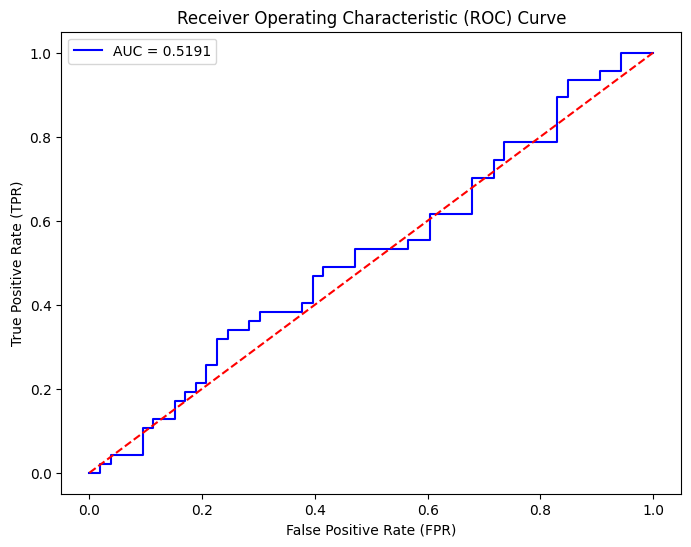

In [24]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_true, y_pred_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_roc:.4f}")
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()